# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. January 2021.


We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [1]:
rm(list = ls())   # erase everything, start from scratch!

# load the data from package funFEM
library("funFEM")
data(velib)
help("velib")

Loading required package: MASS

Loading required package: fda

Loading required package: splines

Loading required package: Matrix

Loading required package: fds

Loading required package: rainbow

Loading required package: pcaPP

Loading required package: RCurl


Attaching package: 'fda'


The following object is masked from 'package:graphics':

    matplot


Loading required package: elasticnet

Loading required package: lars

Loaded lars 1.2




In [2]:
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

# consider a subsample
set.seed(0)
n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

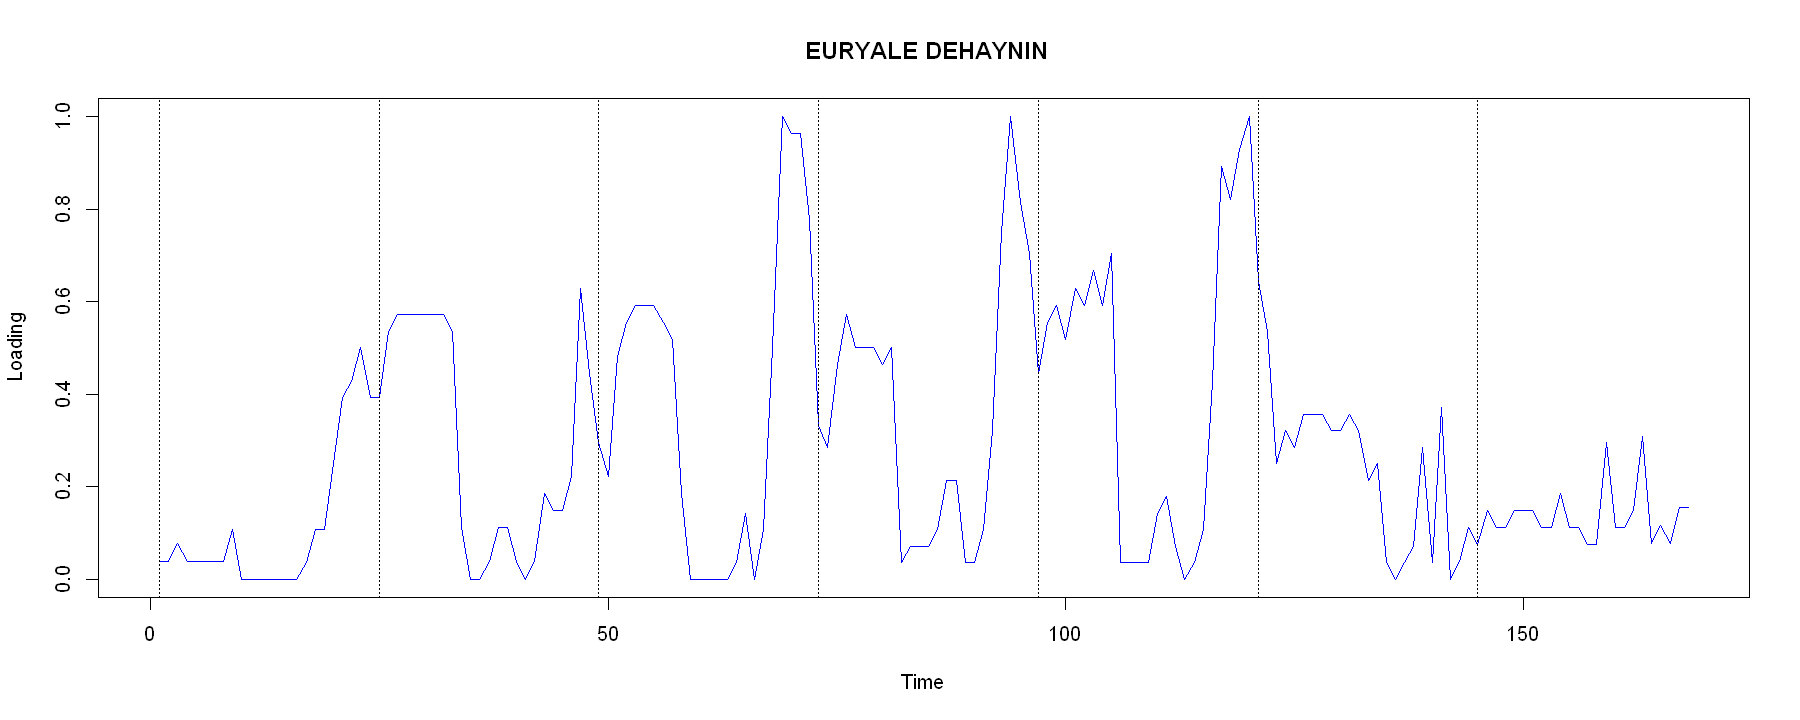

In [3]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))
options(repr.plot.width = 15, repr.plot.height = 6)

plot(x[1, ], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "Loading", main = rownames(x)[1])
abline(v = timeTick, lty = "dotted")


In [4]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing
# rownames(x) <- 1:nrow(x)

# Descriptive statistics.

Some ideas : 

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).

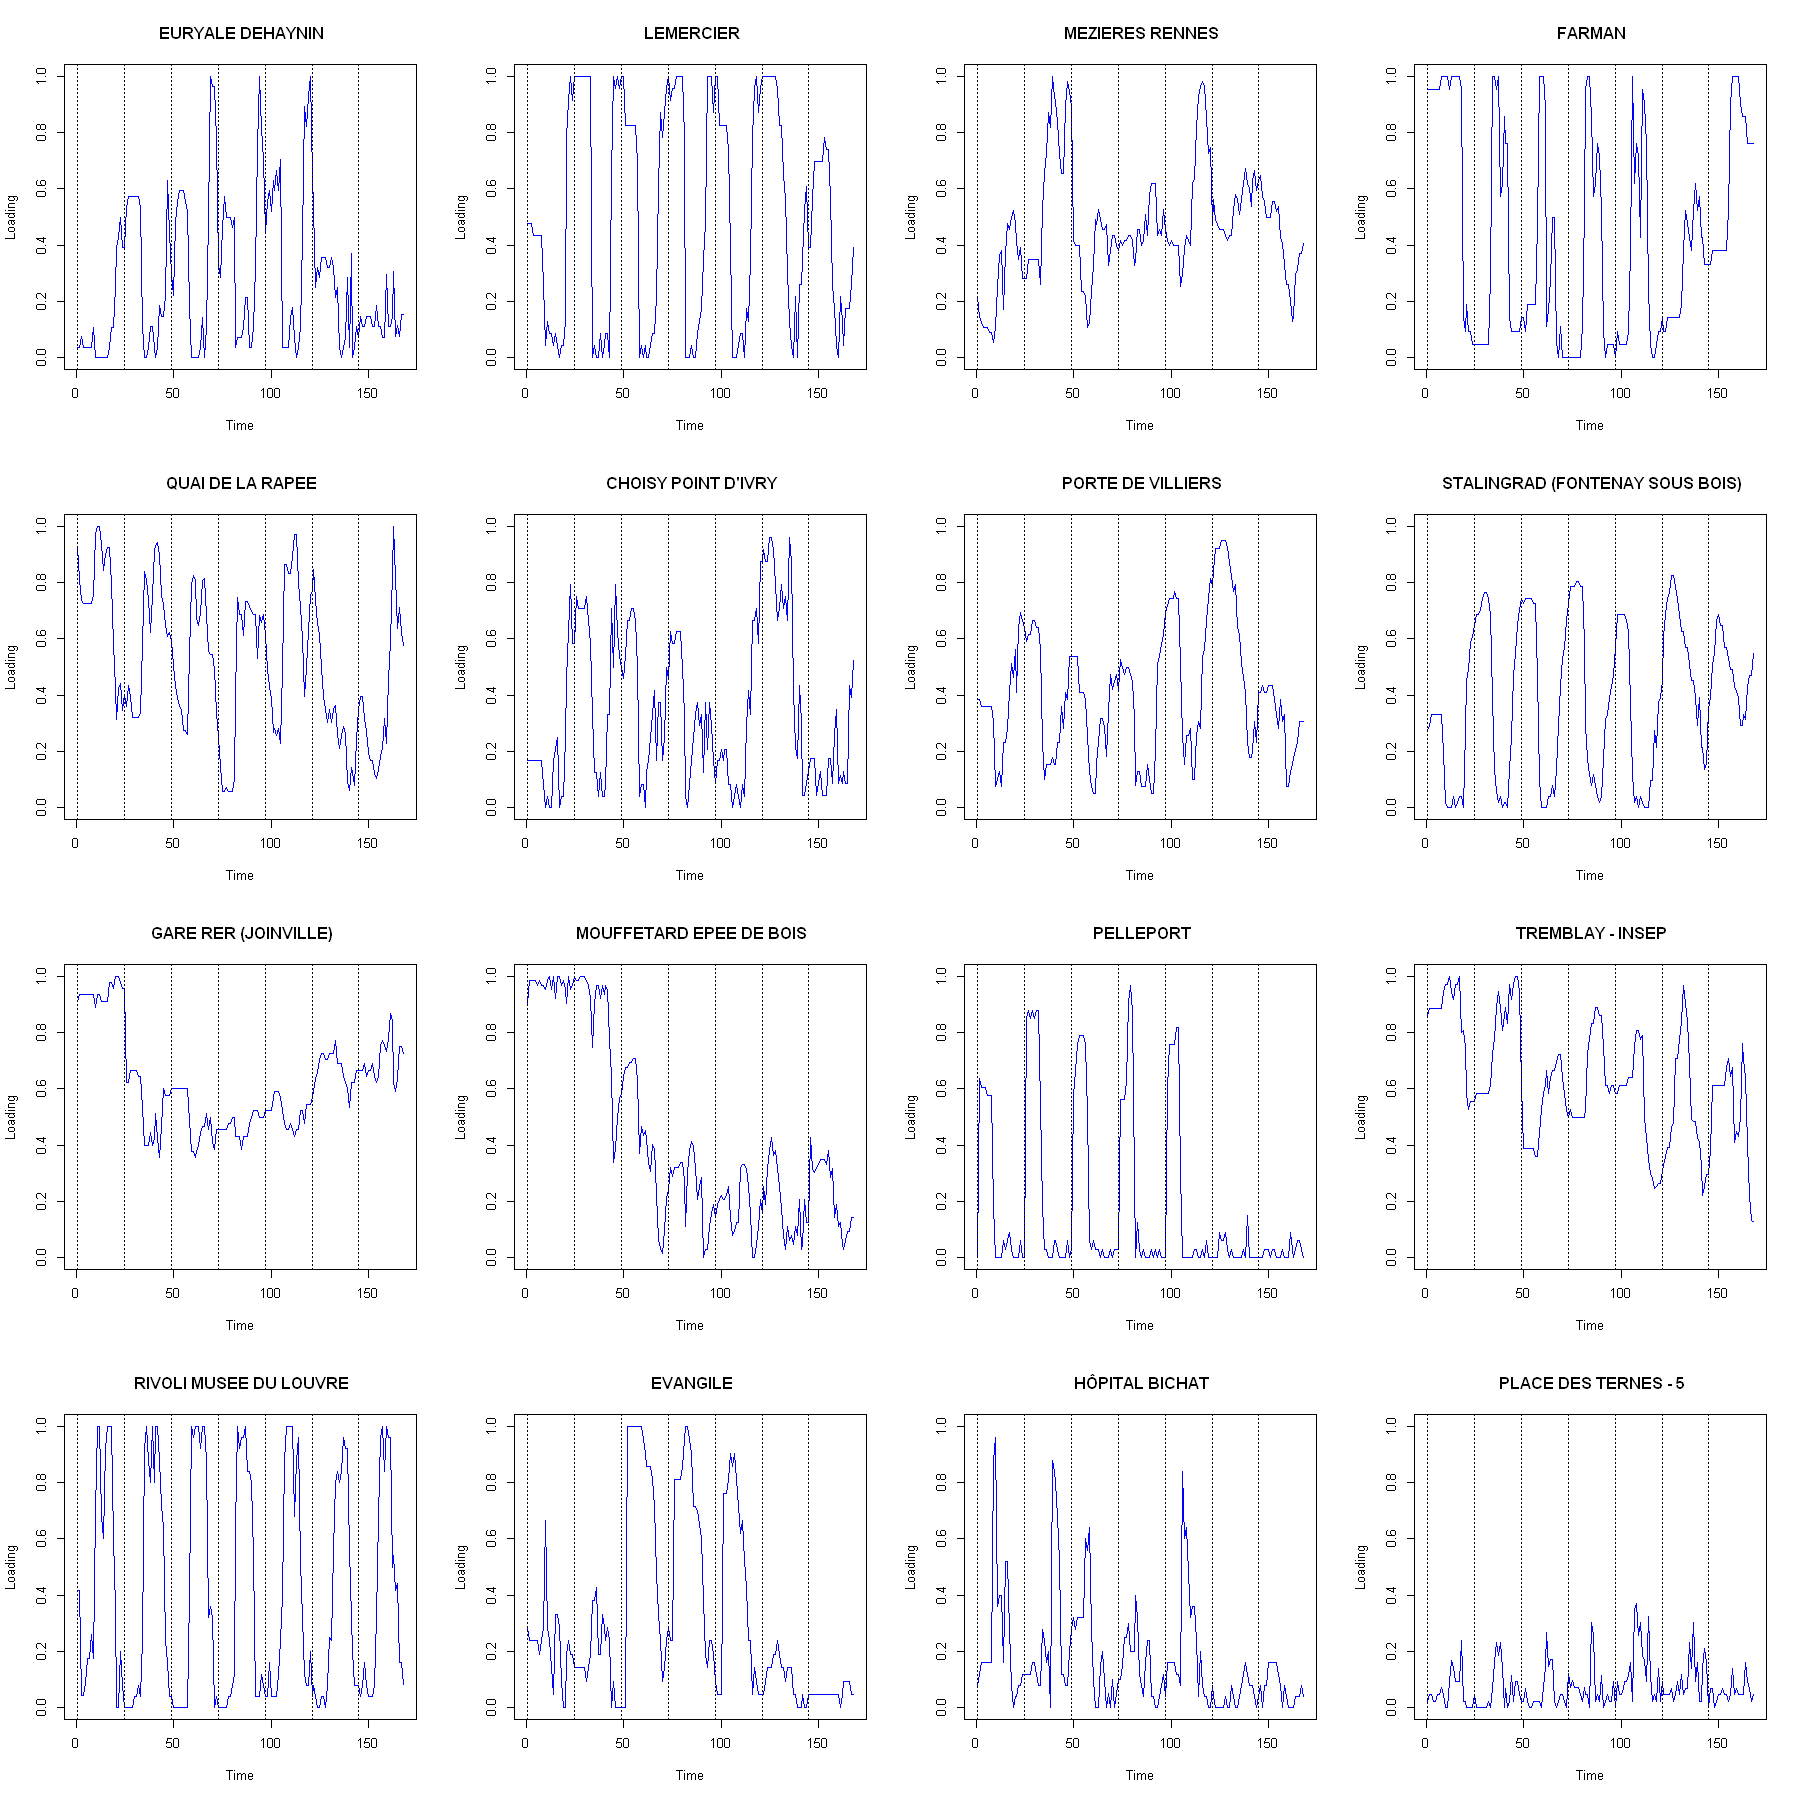

In [5]:
par(mfrow=c(4,4))
options(repr.plot.width = 15, repr.plot.height = 15)
for (i in c(1:16)){
    plot(x[i, ], col = "blue", type = "l", ylim = c(0, 1), xlab = "Time", ylab = "Loading", main = rownames(x)[i])
    abline(v = timeTick, lty = "dotted")
}
rownames(x) <- 1:nrow(x)

En regardant les 16 premières stations de vélib, on peut voir un comportement similaire dans toutes les stations :
- Il y a une quantité de pics d'activité qui semble être liée aux jours de la semaine (il y a un pic d'activité pour chaque jour)
- Certaines stations sont moins actives que d'autres (on peut par exemple comparer l'activité de la station 13 et 16).

2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry?

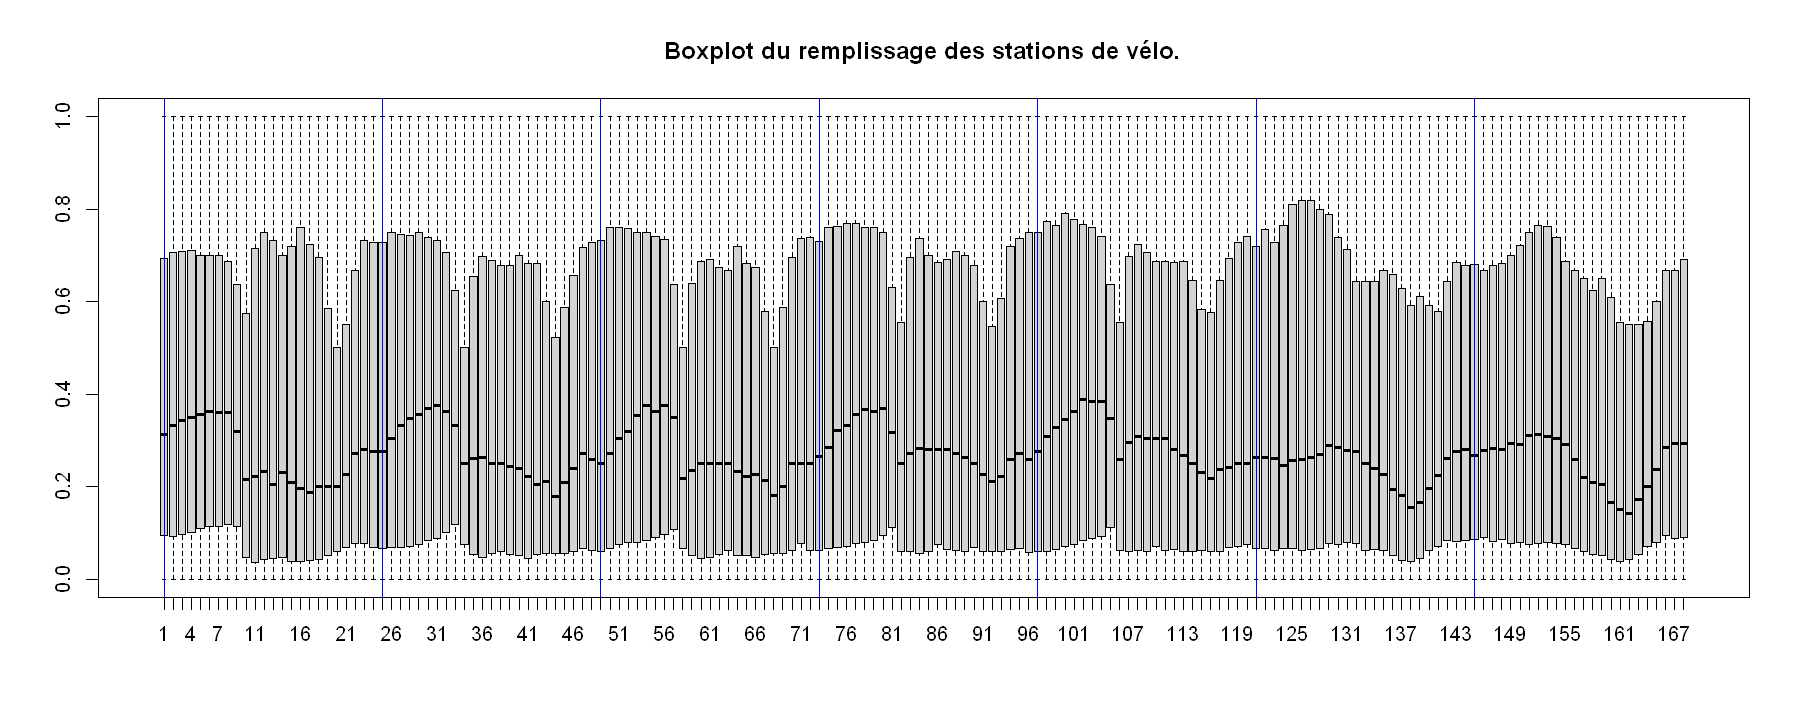

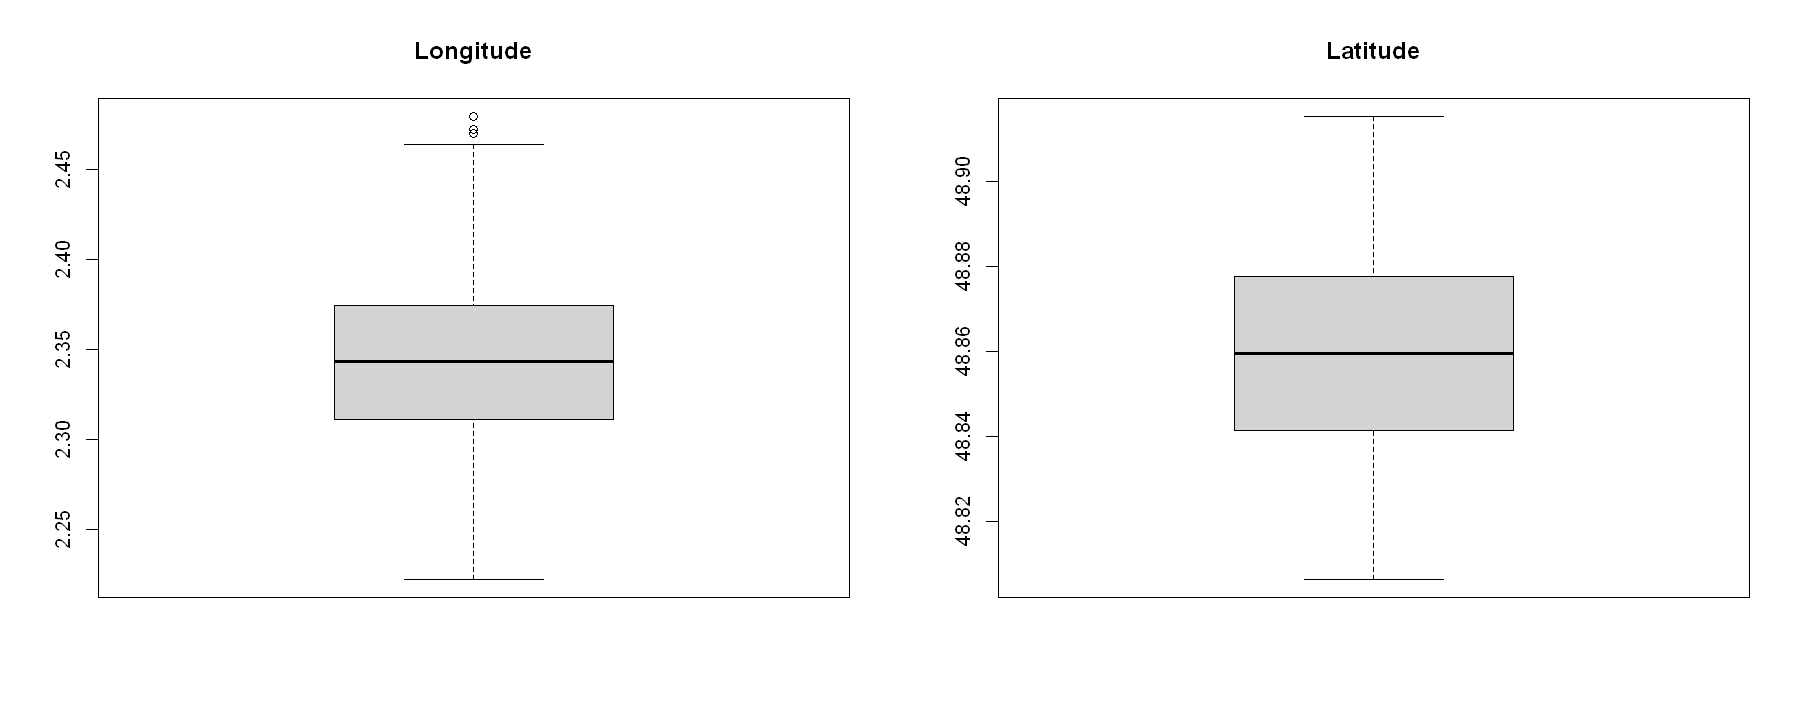

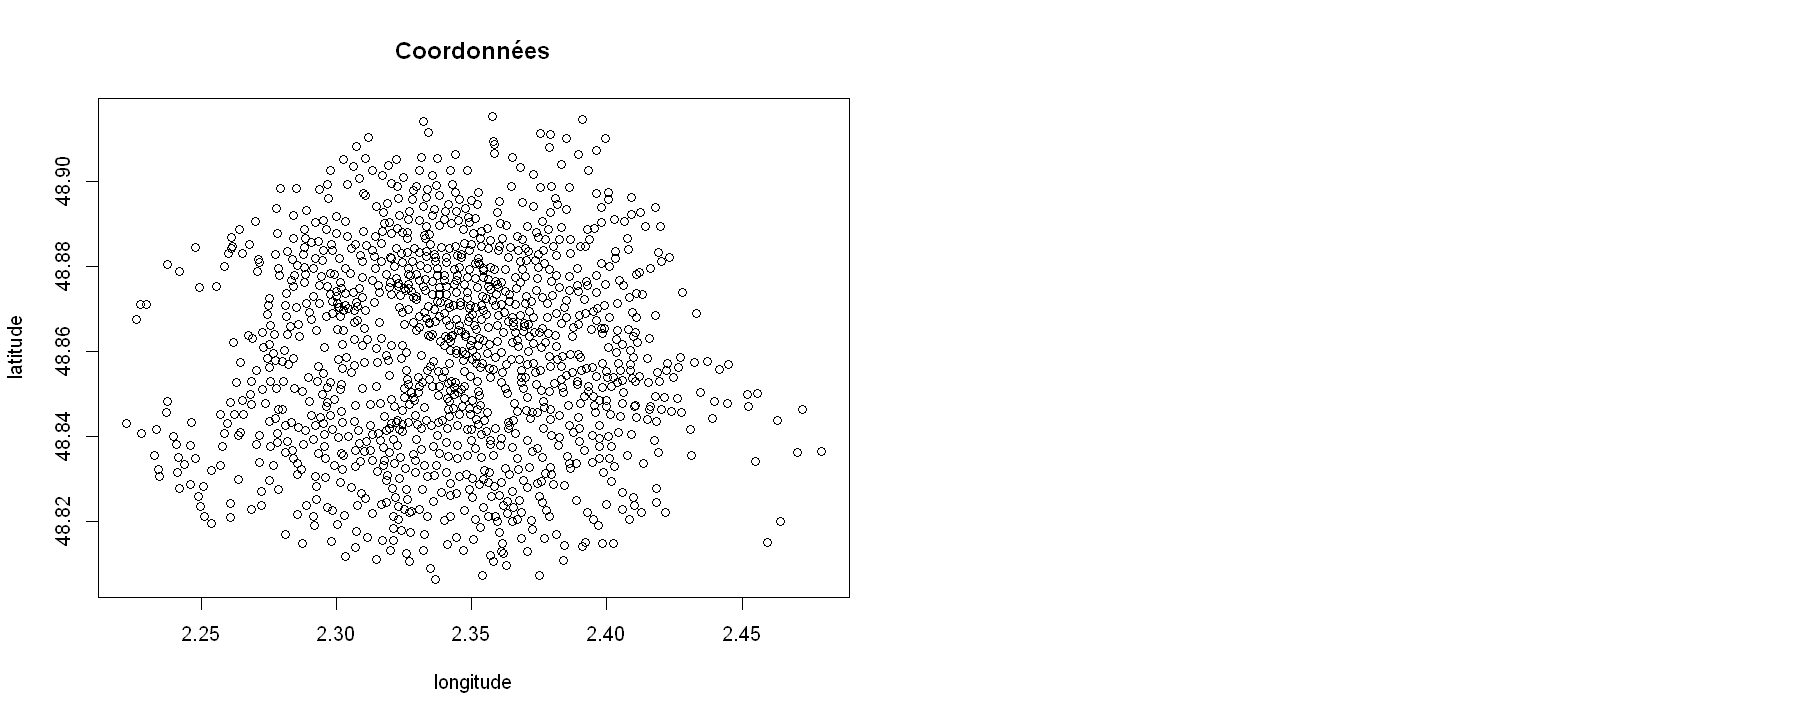

In [8]:
options(repr.plot.width = 15, repr.plot.height = 6)
boxplot(x, main = "Boxplot du remplissage des stations de vélo.")
abline(v = timeTick,col='blue')
longitude=velib$position[1]
latitude =velib$position[2]
par(mfrow=c(1,2))
boxplot(longitude, main = "Longitude")
boxplot(latitude, main = "Latitude")

En traçant les boxplots des variables, on peut en déduire plusieurs conclusions.
Premièrement, on retrouve bien une utilisation quasi-périodique des vélibs dans l'ensemble des stations de vélib. On retrouve bien les pics d'activité, plus prononcée en semaine plutôt qu'en weekend. 

La symétrie ici n'est pas trop présente, l'ensemble des stations de vélib semblent être généralement plus vide que complets. 

Attention, un pic d'utilisation correspond dans les graphiques à des minima, car l'axe des ordonnées représente le taux de présence des vélos dans les stations.

Quant à la distribution de la distribution de la position, elle semble être à peu près équitable pour tout Paris. Cependant, on observe une concenatration plus élevée en centre-ville, où le couple longitude et latitude valent environ 2,35 et 48,86 respectivement.

3. Investigate the temporal correlation of the variables. 
For instance, for a given station, plot the loading at t+h versus loading at time t.
Visualize the correlation matrix by an image plot. Interpret the result.

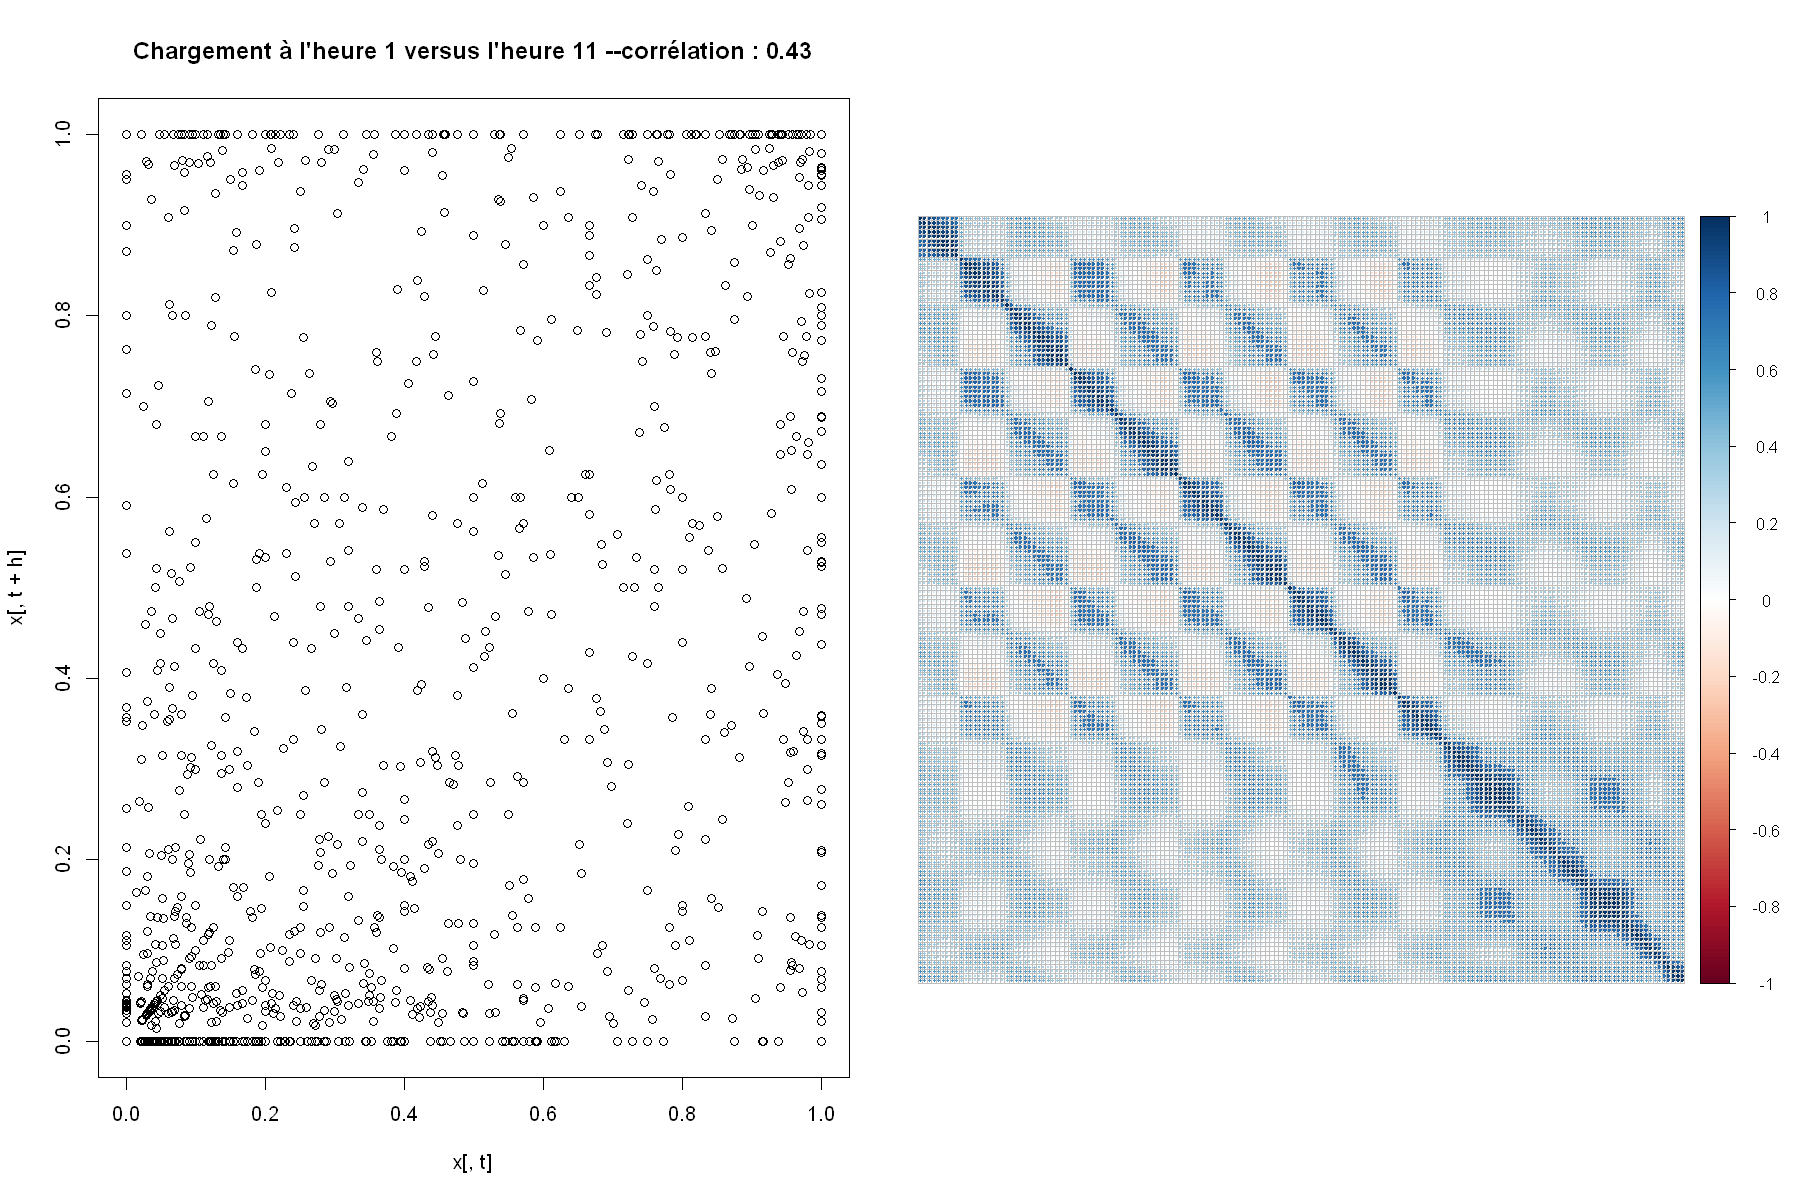

In [45]:
t=1
h=10
mycor=round(cor(x[,t],x[,t+h]),2)
cormat=cor(x)
par(mfrow=c(1,2))
plot(x[,t],x[,t+h],main=paste("Chargement à l'heure",t,"versus l'heure",t+h,"--corrélation :",mycor))
corrplot(cormat,tl.pos="n")

4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use a different color for stations which are located on a hill.

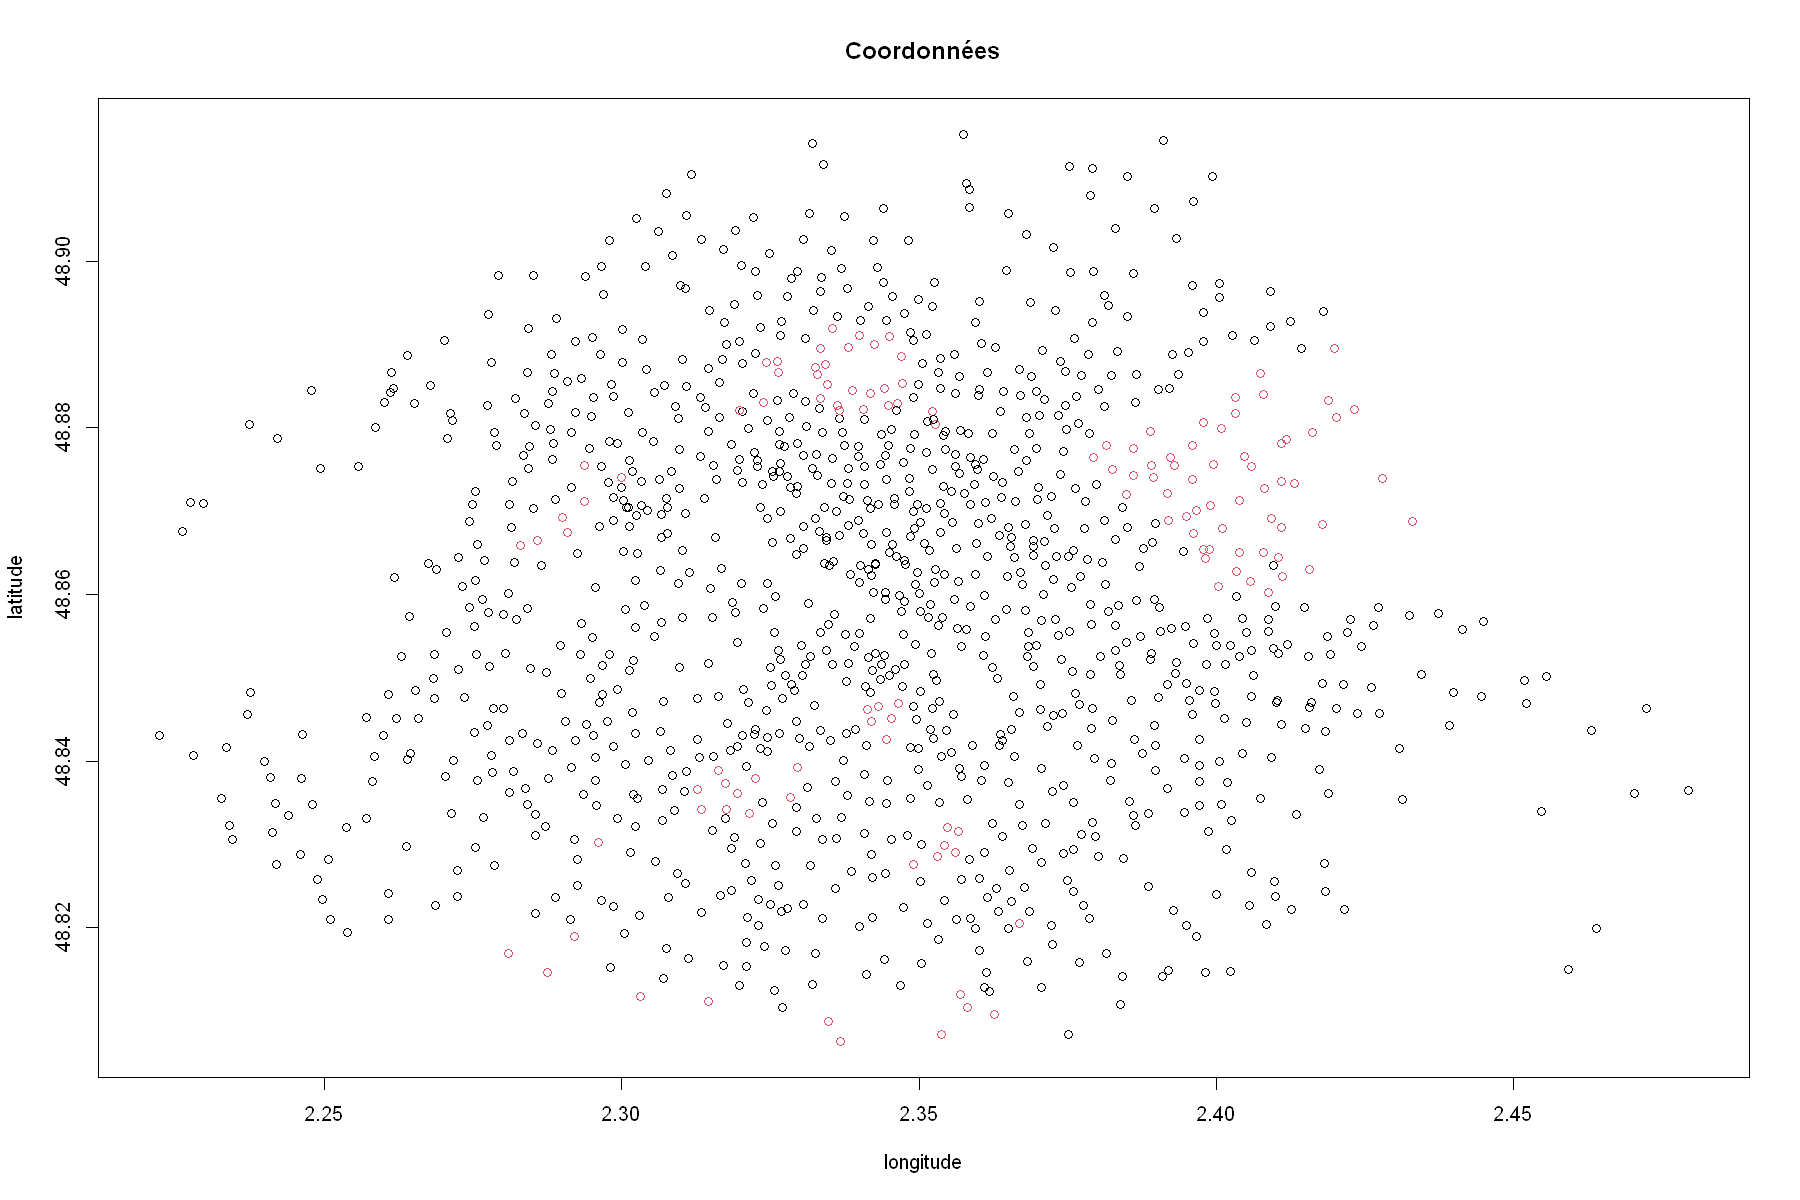

In [63]:
options(repr.plot.width = 15, repr.plot.height = 10)
library(rlist)
plot(velib$position,col=factor(velib$bonus) ,main="Coordonnées")

5. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

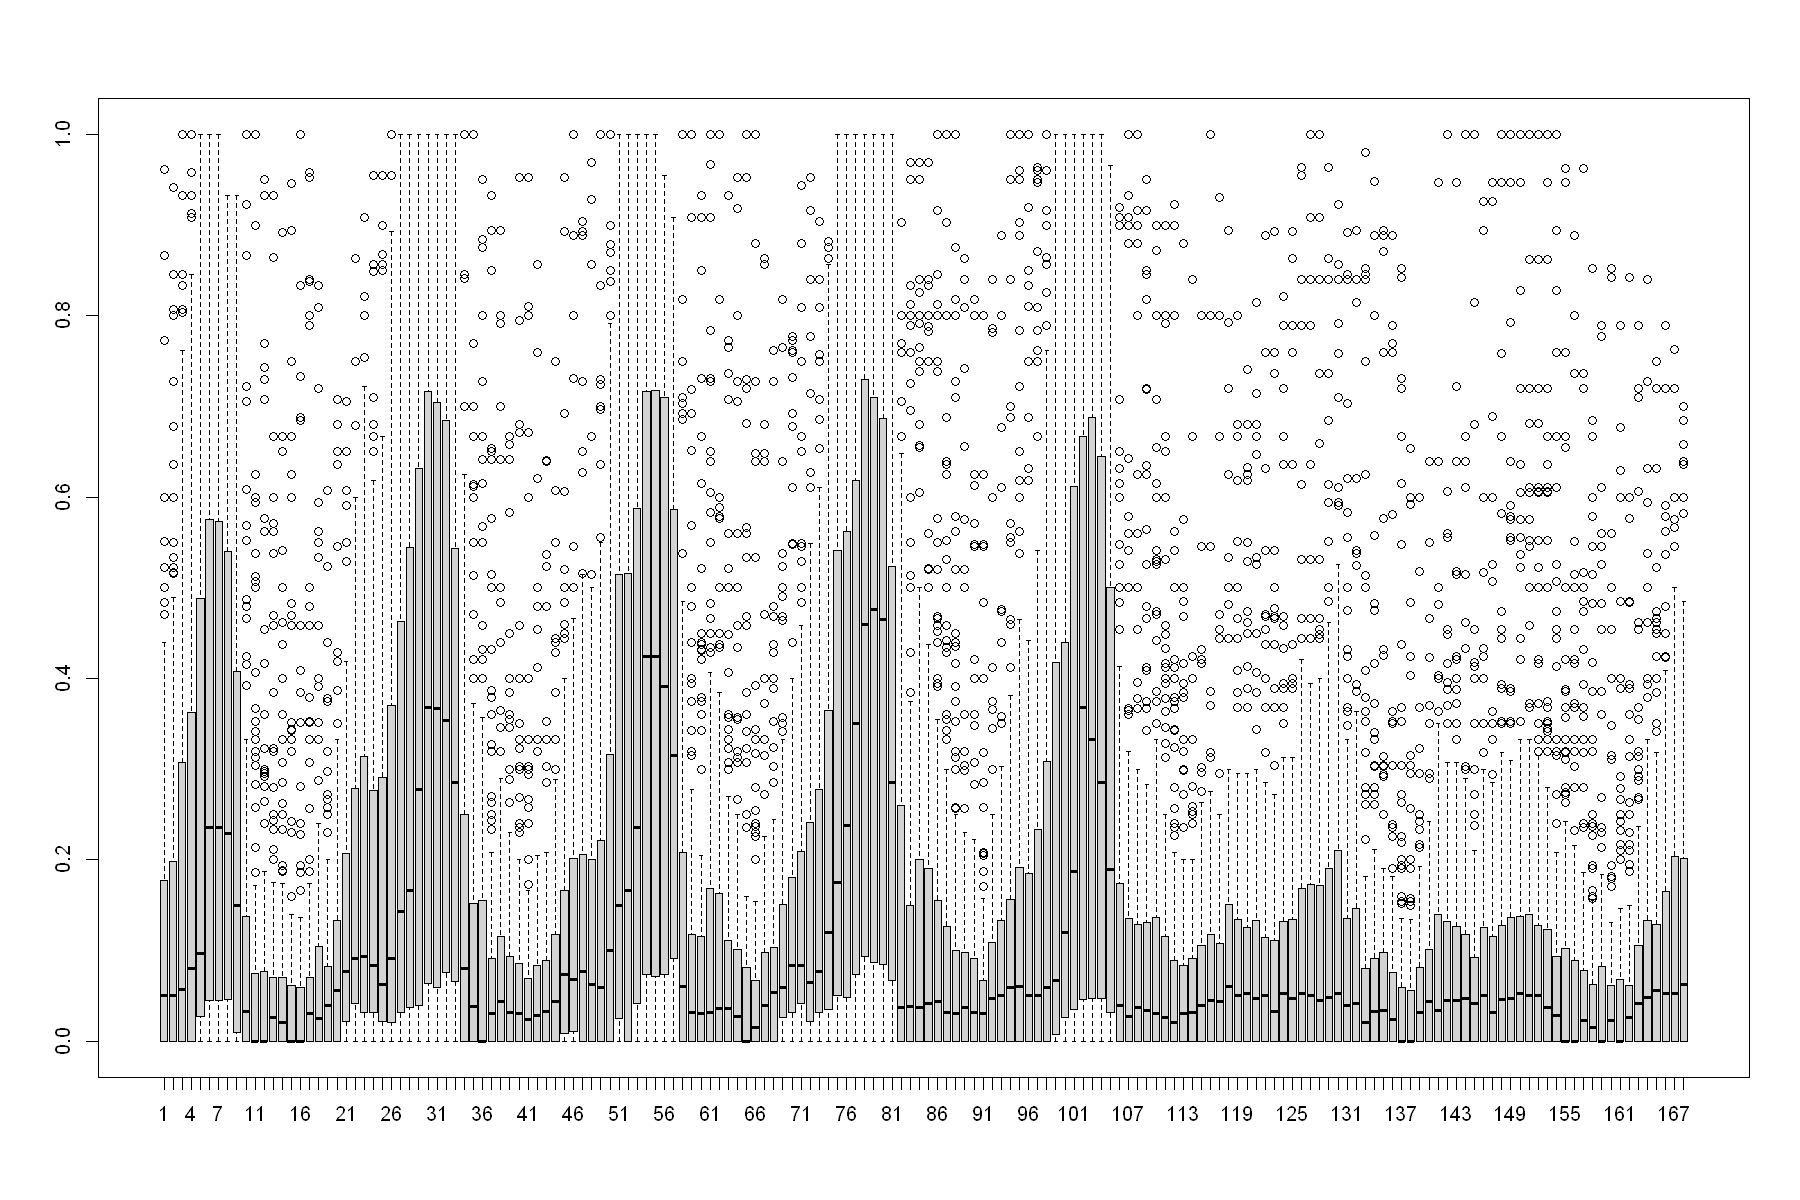

In [73]:
stationHill=which(velib$bonus==1)
boxplot(x[stationHill,])